In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

---- Simulation parameters ----
Generations:    100
Iterations:     300
Total iters:    30000
Signal power:   3.00 dB
Noise power:    20.00 dB
Noise uncert:   0.00 dB
SNR:            -17.00 dB
Signal length:  0.001024 sec
Signal samples: 1024
---- Simulation stats theory ----
Prob false alarm 0.1000
Prob detection   0.7171
Threshold        11513.8233
---- Running simulation ----
Using 8 processes on 8 cores


100%|██████████| 100/100 [00:04<00:00, 21.59it/s]


---- Simulation stats ----
Prob false alarm theory 0.1000
Prob false alarm sim    0.1037
Prob detection theory   0.7171
Prob detection sim      0.7231


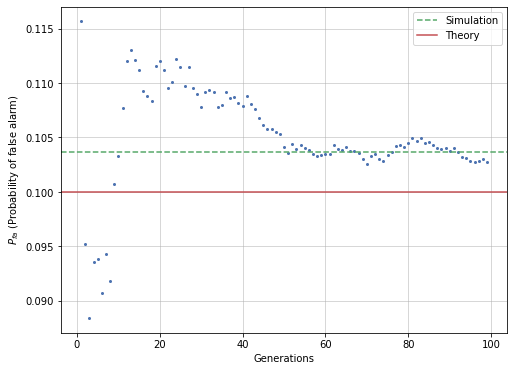

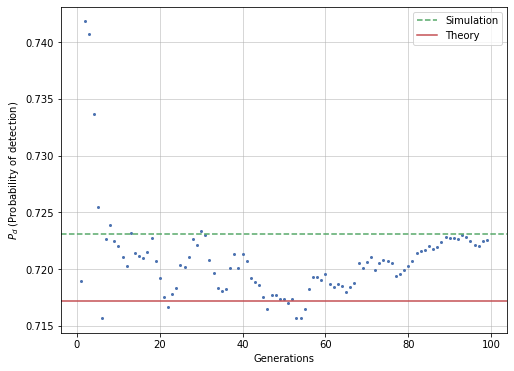

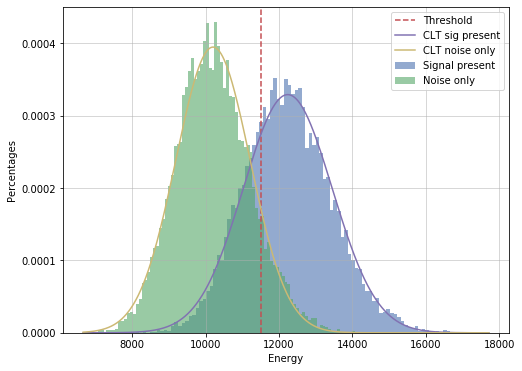

---- Distribution stats ----
Sig present mean 12236.74
Sig absent  mean 10216.83
Sig present var  1411051.13
Sig absent  var  1035638.55
Sig present std  1187.88
Sig absent  std  1017.66


In [2]:
# wideband band energy detector simulation

_ = ss.wideband_sim(
    gens=100,  # generations, number of environments
    itrs=300,  # iterations, number of tests in each environment
    f_sample=1e6,  # in Hz
    signal_power=3.0,  # in dB
    noise_power=20.0,  # in dB
    length_sec=0.001024,  # length of each sample in seconds
    theo_pfa=0.1,  # probability of false alarm
    noise_uncert=0.0,  # standard deviation of the noise normal distribution
    num_procs=None,  # number of processes to run in parallel
    window='box',  # window used with fft
    fft_len=1024,  # samples used for fft
    num_bands=10,  # total number of bands
    f_center=-1.5e5,  # signal center frequency
    band_to_detect=3)  # band to 'search' for signal in

# windows, except for the 'box' (rectangular) window distort the energy distribution
# and result in wrong statistics -> try 'flattop' for example